In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [332]:
df = pd.read_excel('dataset.xlsx')
df = df.set_index(pd.DatetimeIndex(df['tf'].values))
df.drop(['tf'], inplace = True, axis = 1)
rates = 'Rates_0'

In [333]:
df.head()

,Rates_0,Rates_1,Rates_2,Rates_3,Rates_4,Rates_5,Rates_6,Rates_7,Rates_8,Rates_9,Rates_10
2008-01-02,36.25,3.843,3.930,4.208,4.534,3.978,4.482,4.239,-4.350,17.570,18.700
2008-01-03,37.20,3.813,3.904,4.191,4.533,3.957,4.470,4.233,-3.325,18.305,19.350
2008-01-04,38.90,3.763,3.837,4.134,4.511,3.904,4.424,4.178,-2.545,18.455,21.450
2008-01-07,39.55,3.788,3.837,4.129,4.518,3.936,4.436,4.189,-2.825,18.675,22.575
2008-01-08,40.45,3.828,3.871,4.158,4.540,3.976,4.452,4.212,-2.625,19.275,22.875


In [334]:
#Calculate simple moving average
def SMA(data, period = 30, column = rates):
    return data[column].rolling(window=period).mean()

In [335]:
df['SMA'] = SMA(df, 14)
df['Simple_Returns'] = df.pct_change(1)[rates]
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df[rates]/df['SMA']
df

,Rates_0,Rates_1,Rates_2,Rates_3,Rates_4,Rates_5,Rates_6,Rates_7,Rates_8,Rates_9,Rates_10,SMA,Simple_Returns,Log_Returns,Ratios
2008-01-02,36.250,3.843,3.930,4.208,4.534,3.978,4.482,4.239,-4.350,17.570,18.700,NaN,NaN,NaN,NaN
2008-01-03,37.200,3.813,3.904,4.191,4.533,3.957,4.470,4.233,-3.325,18.305,19.350,NaN,0.026207,0.025869,NaN
2008-01-04,38.900,3.763,3.837,4.134,4.511,3.904,4.424,4.178,-2.545,18.455,21.450,NaN,0.045699,0.044685,NaN
2008-01-07,39.550,3.788,3.837,4.129,4.518,3.936,4.436,4.189,-2.825,18.675,22.575,NaN,0.016710,0.016571,NaN
2008-01-08,40.450,3.828,3.871,4.158,4.540,3.976,4.452,4.212,-2.625,19.275,22.875,NaN,0.022756,0.022501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,56.516,-0.646,-0.283,0.282,0.884,0.659,2.824,0.713,38.775,61.125,55.700,57.962000,0.000000,0.000000,0.975053
2018-12-26,56.516,-0.646,-0.283,0.282,0.884,0.659,2.824,0.713,38.775,61.125,55.700,57.777429,0.000000,0.000000,0.978167
2018-12-27,56.488,-0.668,-0.308,0.266,0.878,0.629,2.749,0.710,38.300,61.100,56.300,57.632357,-0.000495,-0.000496,0.980144
2018-12-28,54.800,-0.649,-0.298,0.277,0.888,0.607,2.748,0.722,37.300,61.450,56.700,57.365357,-0.029882,-0.030338,0.955280


In [336]:
#Statistics
df['Ratios'].describe()

count    2856.000000
mean        1.003471
std         0.110307
min         0.170648
25%         0.951296
50%         1.001246
75%         1.051643
max         2.010127
Name: Ratios, dtype: float64

In [337]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(df['Ratios'].dropna(), percentiles)
p

array([0.84128617, 0.89004173, 1.00124584, 1.11546945, 1.15894078])

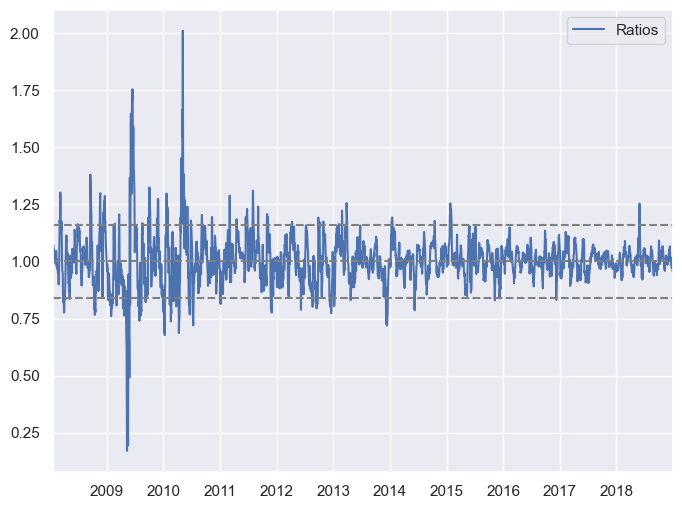

In [338]:
df['Ratios'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--', label = '5th percentile')
plt.axhline(p[2], c= (.5,.5,.5), ls='--', label = '50th percentile')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--', label = '95th percentile');

In [339]:
#Buy/sell signals
sell = p[-1]
buy = p[0]
df['position'] = np.where(df.Ratios > sell, -1, np.nan)
df['position'] = np.where(df.Ratios < buy, 1, df['position'])
df['position'] = df['position'].ffill()

#Add buy/sell signals columns
df['Buy'] = np.where(df.position == 1, df[rates], np.nan)
df['Sell'] = np.where(df.position == -1, df[rates], np.nan)

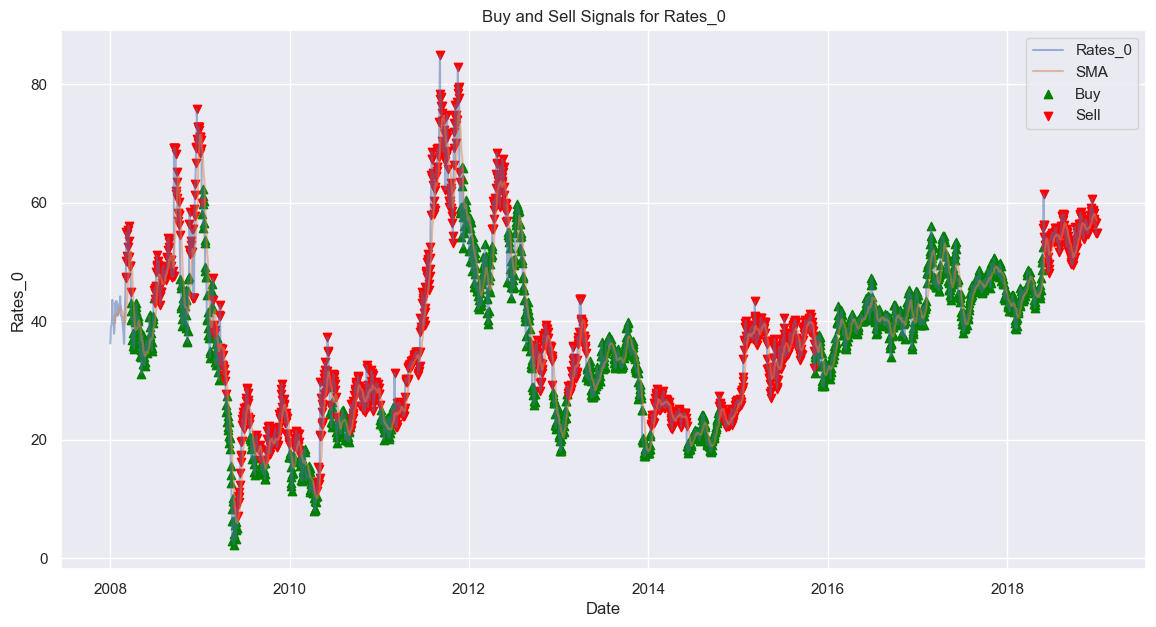

In [340]:
#Visualisation
plt.figure(figsize=(14,7))
plt.title(f'Buy and Sell Signals for {rates}')
plt.plot(df[rates],alpha = 0.5, label = rates)
plt.plot(df['SMA'],alpha = 0.5, label = 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy', marker= '^', alpha=1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell', marker= 'v', alpha=1)
plt.xlabel('Date')
plt.ylabel(rates)
plt.legend()
plt.show()

In [341]:
df['Strategy_Returns'] = df.position.shift(1) * df.Log_Returns
df['Strategy_Returns']

2008-01-02         NaN
2008-01-03         NaN
2008-01-04         NaN
2008-01-07         NaN
2008-01-08         NaN
                ...   
2018-12-25   -0.000000
2018-12-26   -0.000000
2018-12-27    0.000496
2018-12-28    0.030338
2018-12-31   -0.000000
Name: Strategy_Returns, Length: 2869, dtype: float64

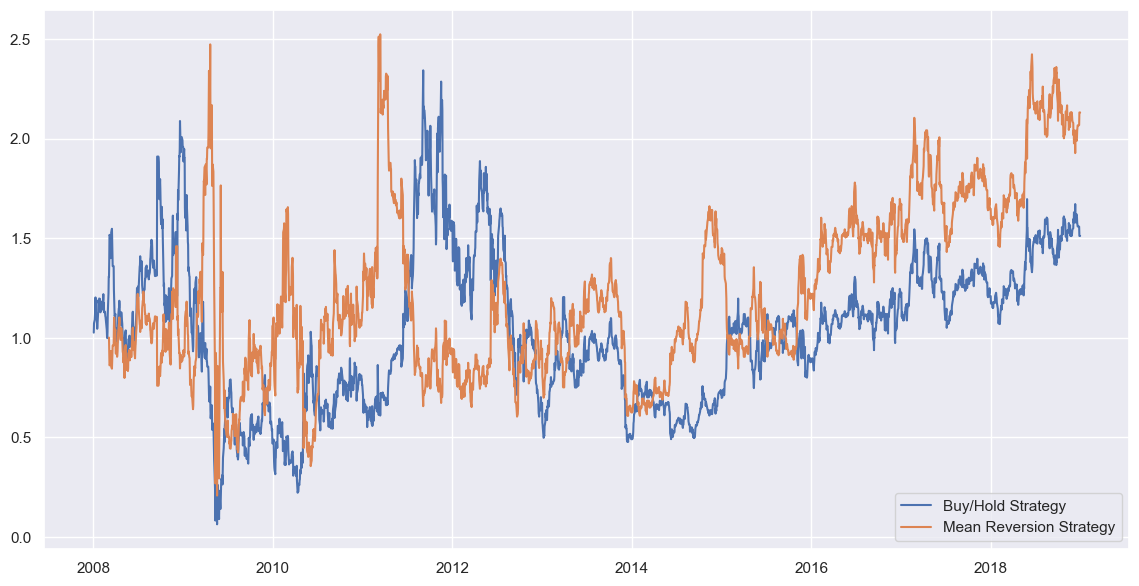

In [342]:
plt.figure(figsize=(14,7))
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), label='Mean Reversion Strategy')
plt.legend();

In [343]:
print('Buy/Hold Strategy Returns:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
print('Mean Reversion Strategy Returns:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] - 1)

Buy/Hold Strategy Returns: 0.511724137931044
Mean Reversion Strategy Returns: 1.1318967147375187


/var/folders/r7/5t16pdd54ybf8xj96yty3p7h0000gn/T/ipykernel_97385/1493132504.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy/Hold Strategy Returns:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
/var/folders/r7/5t16pdd54ybf8xj96yty3p7h0000gn/T/ipykernel_97385/1493132504.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Mean Reversion Strategy Returns:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] - 1)
